In [1]:
import sys
sys.path.append('../')
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

from Core.Dataset.Dataloader import Data_Loader,Image_Dataset,DataFiles

# Import M3d-CAM
from medcam import medcam
import torch
from monai.networks.nets import resnet10
from monai.transforms import ToTensor,EnsureChannelFirst,Compose,Resize
from Core.Utils import Swin_Transformer_Classification
import SimpleITK as sitk
import numpy as np
from scipy.ndimage import zoom as zoom
MyCNN = Swin_Transformer_Classification.SwinUNETR(img_size=256,in_channels=1, num_classes=2, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],out_channels=1)

MyCNN_paraq = torch.load('./Weight/Swin_TS.pth')['model']
MyCNN.load_state_dict(MyCNN_paraq)
model = MyCNN

c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Swin_Transformer_Classification.SwinUNETR(pretrained=True)

TypeError: __init__() got an unexpected keyword argument 'pretrained'

In [2]:
train_data_path = '../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed_Train/'
label_dir = '../../Data/Mixed_HGP/True_Label/train_set.csv'
label_name = 'HGP_Type'
train_data = DataFiles(train_data_path,label_dir,label_name)
images_lst = sorted(train_data.get_images())
labels_lst = train_data.get_labels()
train_data.Data_check()

transoform = Compose([EnsureChannelFirst(),ToTensor(),Resize((256,256,32))])
train_images = images_lst
train_labels = labels_lst
tr_dataset = Image_Dataset(image_files=train_images,labels=train_labels,transform_methods=transoform,data_aug=True,label_name=None)
data_loader = Data_Loader(dataset=tr_dataset,num_workers=0,batch_size=1).build_train_loader() 


# Inject model with M3d-CAM
model = medcam.inject(model, output_dir="./attention_maps_SW_TS/", backend='gcam', layer='swinViT.layers4.0', label=1, save_maps=True,return_attention=True)

# Continue to do what you're doing...
# In this case inference on some new data
model.eval()





SwinUNETR(
  (swinViT): SwinTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(1, 24, kernel_size=(2, 2, 2), stride=(2, 2, 2))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (layers1): ModuleList(
      (0): BasicLayer(
        (blocks): ModuleList(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=24, out_features=72, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=24, out_features=24, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path): Identity()
            (norm2): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
            (mlp): MLPBlock(
              (linear1): Linear(in_features=24, out_features=96, bias=True)
              (linear2): Linear(in_features=96, ou

In [3]:
for i,(im,label) in enumerate(data_loader):
    if i==4:
    #rotate and flip
        im = torch.rot90(im,k=3,dims=(2,3))
        im = torch.flip(im,[3])
        #permute to [B,C,D,H,W]
        im = im.permute(0,1,4,2,3)
        break



2
this is image and labels ../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed_Train/CILM_CT_100330_0000.nii.gz 0
2
this is image and labels ../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed_Train/CILM_CT_101040_0000.nii.gz 0
2
this is image and labels ../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed_Train/CILM_CT_102030_0000.nii.gz 0
2
this is image and labels ../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed_Train/CILM_CT_107020_0000.nii.gz 0
2
this is image and labels ../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed_Train/CILM_CT_107850_0000.nii.gz 0


In [4]:
model(im)

fucking dhw 21 133 133
torch.Size([1, 48, 8, 64, 64]) this is x1 shape
fucking dhw 14 70 70
fucking dhw 4 35 35
fucking dhw 2 21 21
hidden states out torch.Size([1, 384, 1, 8, 8])
fucking dhw 21 133 133
torch.Size([1, 48, 8, 64, 64]) this is x1 shape
fucking dhw 14 70 70
fucking dhw 4 35 35
fucking dhw 2 21 21
hidden states out torch.Size([1, 384, 1, 8, 8])


(metatensor([[ 0.3358, -0.2993]], grad_fn=<AliasBackward0>),
 tensor([[[[[0.3100, 0.3100, 0.3100,  ..., 0.7998, 0.7998, 0.7998],
            [0.3100, 0.3100, 0.3100,  ..., 0.7998, 0.7998, 0.7998],
            [0.3100, 0.3100, 0.3100,  ..., 0.7998, 0.7998, 0.7998],
            ...,
            [0.2863, 0.2863, 0.2863,  ..., 0.9244, 0.9244, 0.9244],
            [0.2863, 0.2863, 0.2863,  ..., 0.9244, 0.9244, 0.9244],
            [0.2863, 0.2863, 0.2863,  ..., 0.9244, 0.9244, 0.9244]],
 
           [[0.3100, 0.3100, 0.3100,  ..., 0.7998, 0.7998, 0.7998],
            [0.3100, 0.3100, 0.3100,  ..., 0.7998, 0.7998, 0.7998],
            [0.3100, 0.3100, 0.3100,  ..., 0.7998, 0.7998, 0.7998],
            ...,
            [0.2863, 0.2863, 0.2863,  ..., 0.9244, 0.9244, 0.9244],
            [0.2863, 0.2863, 0.2863,  ..., 0.9244, 0.9244, 0.9244],
            [0.2863, 0.2863, 0.2863,  ..., 0.9244, 0.9244, 0.9244]],
 
           [[0.3100, 0.3100, 0.3100,  ..., 0.7998, 0.7998, 0.7998],
            [0.

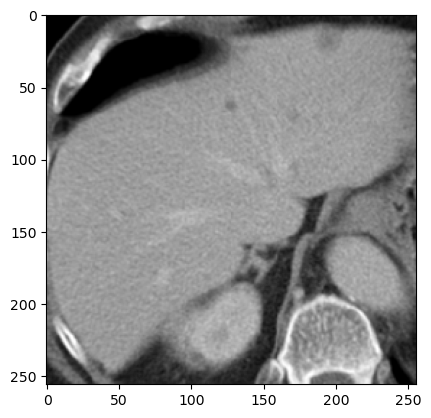

In [4]:
import matplotlib.pyplot as plt
plt.imshow(im[0,0,22,:,:],cmap='gray')

In [5]:
attention_map_1 = sitk.ReadImage('./attention_maps_SW_TS/swinViT.layers4.0/attention_map_0_0_0.nii.gz')
attention_map_1 = sitk.GetArrayFromImage(attention_map_1)
attention_map_1.shape

(1, 8, 8)

In [6]:
def get_resized_heatmap(heatmap, shape):
    """Resize heatmap to shape"""
    # Rescale heatmap to a range 0-255
    upscaled_heatmap = np.uint8(255 * heatmap)

    upscaled_heatmap = zoom(
        upscaled_heatmap,
        (
            shape[0] / upscaled_heatmap.shape[0],
            shape[1] / upscaled_heatmap.shape[1],
            shape[2] / upscaled_heatmap.shape[2],
        ),
    )

    return upscaled_heatmap


resized_heatmap_0 = get_resized_heatmap(attention_map_1, (32,256,256))
resized_heatmap_1 = get_resized_heatmap(attention_map_1, (32,256,256))

In [8]:
import matplotlib.pyplot as plt

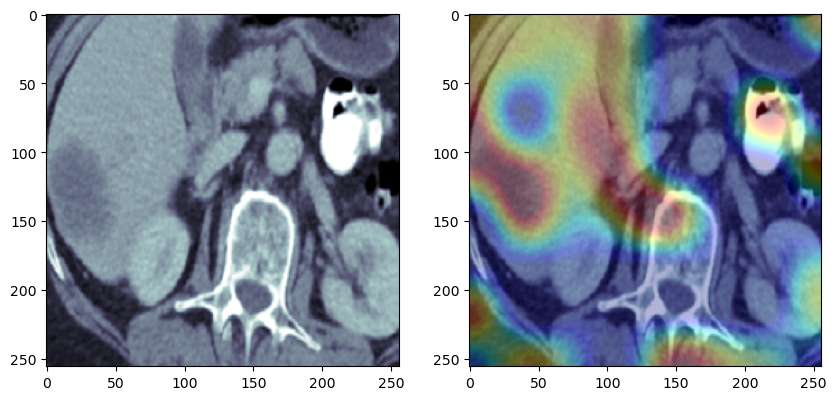

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))

slice = 10
ax[0].imshow(im[0,0,slice, :,:], cmap='bone')


img0 = ax[1].imshow(im[0,0, slice, :,:], cmap='bone')
img1 = ax[1].imshow(resized_heatmap_1[slice, :, :],
                    cmap='jet', alpha=0.3, extent=img0.get_extent())
plt.show()